In [3]:
import requests
import pandas as pd 
import numpy as np
import re
import sys, getopt
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

def load_csv_dataset(file_path):
    return pd.read_csv(file_path)

os.chdir('/Users/finneganlaister-smith/Downloads/DEV ENVIRONMENT/data-science-jupyter-template-main/footy_project_market_value_rankings')

os.getcwd()

latest_match_data = load_csv_dataset('create_dataset_1/CSVs we use often/latest_match_data_june_18_SUPERSTAR_INFO_ADDED.csv')
latest_match_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
pd.set_option('display.max_columns', None)

In [218]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import LogLocator, ScalarFormatter

def plot_competition_data_rank_difference(subset, competition_name):
    # Drop rows with NaN values in 'average_rank_prediction_correct'
    subset = subset.dropna(subset=['average_rank_prediction_correct'])
    
    plt.figure(figsize=(10, 6))
    
    # Create the plot
    plot = sns.lineplot(data=subset, x='interval', y='average_rank_prediction_correct', alpha=0.7)
    
    # Highlight vertical bars where Y value is at or above 0.75
    for _, row in subset.iterrows():
        if row['average_rank_prediction_correct'] >= 0.75:
            plt.axvspan(row['interval'] - 0.1, row['interval'] + 0.1, color='lightpink', alpha=0.3)
    
    # Add scatter plot with conditional coloring
    scatter = sns.scatterplot(
        data=subset, 
        x='interval', 
        y='average_rank_prediction_correct', 
        size='sample_size', 
        legend=False, 
        sizes=(20, 200),
        hue=subset['average_rank_prediction_correct'] >= 0.75,  # Conditional coloring
        palette={True: 'red', False: 'blue'}  # Colors for the condition
    )
    
    # Calculate the maximum sample size
    max_sample_size = subset['sample_size'].max()
    
    # Add text annotations for sample size with much larger intervals
    last_annotation_index = -np.inf
    smallest_sample_sizes = subset.nsmallest(5, 'sample_size')
    for i, row in subset.iterrows():
        # Calculate the interval based on a much larger base interval
        interval = int(3000 / (1 + 2 * np.log1p(row['average_rank_prediction_correct'])))
        
        # Adjust interval based on sample size with multiple thresholds
        if row['sample_size'] < 0.5 * max_sample_size:
            interval *= 2  # Increase the interval when sample size is less than 50% of the max sample size
        if row['sample_size'] < 0.2 * max_sample_size:
            interval *= 2  # Further increase the interval when sample size is less than 20% of the max sample size
        if row['sample_size'] < 0.1 * max_sample_size:
            interval *= 2  # Further increase the interval when sample size is less than 10% of the max sample size
        
        if i - last_annotation_index >= interval or row['sample_size'] in smallest_sample_sizes['sample_size'].values:
            plt.text(row['interval'], row['average_rank_prediction_correct'] + 0.1, f'{int(row["sample_size"])}',
                     horizontalalignment='center', size='small', color='black', weight='semibold', rotation=90)
            last_annotation_index = i
    
    # Add text annotations for sample size above selected points
    selected_points = subset.iloc[::3]  # Select every 3rd point as an example
    for _, row in selected_points.iterrows():
        plt.text(row['interval'], row['average_rank_prediction_correct'] + 0.05, f'{int(row["sample_size"])}',
                 horizontalalignment='center', size='small', color='black', weight='semibold')
    
    # Add a legend for the sample size text
    plt.text(0.05, 0.95, 'Sample Size', horizontalalignment='left', verticalalignment='top', 
             transform=plt.gca().transAxes, size='medium', color='black', weight='semibold', rotation=0)
    
    # Find the highest X value
    max_x_value = subset['interval'].max()
    max_x_row = subset[subset['interval'] == max_x_value].iloc[0]
    max_x_y_value = max_x_row['average_rank_prediction_correct']
    
    # Add text annotation for the highest X value
    plt.text(max_x_value, max_x_y_value, f'Highest X: {max_x_value}', 
             horizontalalignment='right', size='medium', color='red', weight='semibold')
    
    # Set X axis to a logarithmic scale
    plt.xscale('log')
    
    # Set X axis ticks to show more ticks with custom spacing
    ax = plt.gca()
    ax.xaxis.set_major_locator(LogLocator(base=10.0, subs=[1, 2, 3, 5, 7], numticks=15))
    ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=50))
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.tick_params(axis='x', which='both', rotation=45)
    
    # Set Y axis limits
    plt.ylim(0, 1)
    
    # Add more Y axis ticks
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    # Add labels and title
    plt.title(f"% of correctly predicted matches by difference in FIFA Ranking, {competition_name}", pad=20, loc='left')
    plt.xlabel("Interval (log scale)")
    plt.ylabel("Average Rank Prediction Correct")
    
    # Use a minimal theme
    sns.despine()
    plt.savefig(f'/Users/finneganlaister-smith/Downloads/{competition_name}_above_intervals_win%_lower_ranked_team.png')

    # Display the plot
    plt.show()

    
    # Clear the current plot to free memory
    plt.clf()


In [219]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import LogLocator, ScalarFormatter

def plot_competition_data_below(subset, competition_name, annotation_interval=20, secondary_annotation_interval=40):
    # Drop rows with NaN values in 'average_rank_prediction_correct'
    subset = subset.dropna(subset=['average_rank_prediction_correct'])
    
    plt.figure(figsize=(10, 6))
    
    # Create the plot
    plot = sns.lineplot(data=subset, x='interval', y='average_rank_prediction_correct', alpha=0.7)
    
    # Highlight vertical bars where Y value is at or above 0.75
    for _, row in subset.iterrows():
        if row['average_rank_prediction_correct'] >= 0.75:
            plt.axvspan(row['interval'] - 0.1, row['interval'] + 0.1, color='pink', alpha=0.3)
        # Highlight areas where Y value is below 0.3
        if row['average_rank_prediction_correct'] < 0.05:
            plt.axvspan(row['interval'] - 0.1, row['interval'] + 0.1, color='lightpink', alpha=0.5)
    
    # Add scatter plot with conditional coloring
    scatter = sns.scatterplot(
        data=subset, 
        x='interval', 
        y='average_rank_prediction_correct', 
        size='sample_size', 
        legend=False, 
        sizes=(20, 200),
        hue=subset['average_rank_prediction_correct'] <= 0.3,  # Conditional coloring
        palette={True: 'red', False: 'blue'}  # Colors for the condition
    )
    
    # Calculate the maximum sample size
    max_sample_size = subset['sample_size'].max()
    threshold_sample_size_low = 0.1 * max_sample_size  # 10% of the maximum sample size
    secondary_threshold_sample_size = 0.05 * max_sample_size  # 5% of the maximum sample size
    
    # Initialize the last annotated sample size and last annotated index
    last_annotation_index = -annotation_interval  # Ensure the first point can be annotated
    last_secondary_annotation_index = -secondary_annotation_interval  # For secondary threshold
    last_annotated_sample_size = None  # For tracking changes in sample size
    
    # Add text annotations for points where sample size is below 10% of the maximum
    for i, row in subset.iterrows():
        if row['sample_size'] < threshold_sample_size_low:
            if row['sample_size'] >= secondary_threshold_sample_size:
                # Annotate only if the sample size changes by at least 3
                if last_annotated_sample_size is None or abs(row['sample_size'] - last_annotated_sample_size) >= 3:
                    if i - last_secondary_annotation_index >= secondary_annotation_interval:
                        plt.text(row['interval'], row['average_rank_prediction_correct'] + 0.05, f'{int(row["sample_size"])}',
                                 horizontalalignment='center', size='small', color='black', weight='semibold', rotation=90)
                        last_secondary_annotation_index = i
                        last_annotated_sample_size = row['sample_size']
            else:
                if i - last_annotation_index >= annotation_interval:
                    plt.text(row['interval'], row['average_rank_prediction_correct'] + 0.05, f'{int(row["sample_size"])}',
                             horizontalalignment='center', size='small', color='black', weight='semibold', rotation=90)
                    last_annotation_index = i
    
    # Add annotation for sample size exactly at 10% of the maximum or the closest one
    ten_percent_sample_size = threshold_sample_size_low
    ten_percent_row = subset.iloc[(subset['sample_size'] - ten_percent_sample_size).abs().argsort()[:1]]
    if not ten_percent_row.empty:
        row = ten_percent_row.iloc[0]
        plt.text(row['interval'], row['average_rank_prediction_correct'] + 0.05, f'10% Max: {int(row["sample_size"])}',
                 horizontalalignment='center', size='small', color='purple', weight='semibold', rotation=90)

    # Find the lowest X value
    min_x_value = subset['interval'].min()
    min_x_row = subset[subset['interval'] == min_x_value].iloc[0]
    min_x_y_value = min_x_row['average_rank_prediction_correct']
    
    # Add text annotation for the lowest X value, moved down and to the left
    plt.text(min_x_value, min_x_y_value - 0.05, f'Lowest X: {min_x_value}', 
             horizontalalignment='left', size='medium', color='red', weight='semibold')
    
    # Annotate the point where sample_size first reaches the maximum value
    # max_sample_size_row = subset[subset['sample_size'] == max_sample_size].iloc[0]
    # plt.text(max_sample_size_row['interval'], max_sample_size_row['average_rank_prediction_correct'] + 0.05, 
    #          f'Max Sample Size: {int(max_sample_size_row["sample_size"])}', 
    #          horizontalalignment='center', size='medium', color='green', weight='semibold', rotation=90)
    
    # Add text annotations for sample size above selected points, spreading out as the sample size gets larger
    last_annotation_index = -annotation_interval
    for i, row in subset.iterrows():
        if i - last_annotation_index >= annotation_interval:
            plt.text(row['interval'], row['average_rank_prediction_correct'] + 0.05, f'{int(row["sample_size"])}',
                     horizontalalignment='center', size='small', color='black', weight='semibold')
            last_annotation_index = i
            annotation_interval *= 1.1  # Increase the interval for the next annotation
    
    # Set X axis to a logarithmic scale
    plt.xscale('log')
    
    # Set X axis ticks to show more ticks with custom spacing
    ax = plt.gca()
    ax.xaxis.set_major_locator(LogLocator(base=10.0, subs=[1, 2, 3, 5, 7], numticks=15))
    ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=50))
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.tick_params(axis='x', which='both', rotation=45)
    
    # Set Y axis limits
    plt.ylim(0, 1)
    
    # Add more Y axis ticks
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    # Add labels and title
    plt.title(f"% of correctly predicted matches by difference in FIFA Ranking, {competition_name}", pad=20, loc='left')
    plt.xlabel("Interval (log scale)")
    plt.ylabel("Average Rank Prediction Correct")
    
    # Use a minimal theme
    sns.despine()
    plt.savefig(f'/Users/finneganlaister-smith/Downloads/{competition_name}_below_intervals_win%_lower_ranked_team.png')

    # Display the plot
    plt.show()
    
    # Clear the current plot to free memory
    plt.clf()


# By Competition - % the lower ranked team wins

## Above Intervals

In [220]:
above_intervals_by_comp = load_csv_dataset('Analysis_Q1/Ranking Data by competition/By competition, win % of lower FIFA ranked (better) team - above intervals.csv')

In [221]:
# Assuming above_intervals_by_comp is already loaded
competitions_dict_above = {comp: df for comp, df in above_intervals_by_comp.groupby('Competition')}

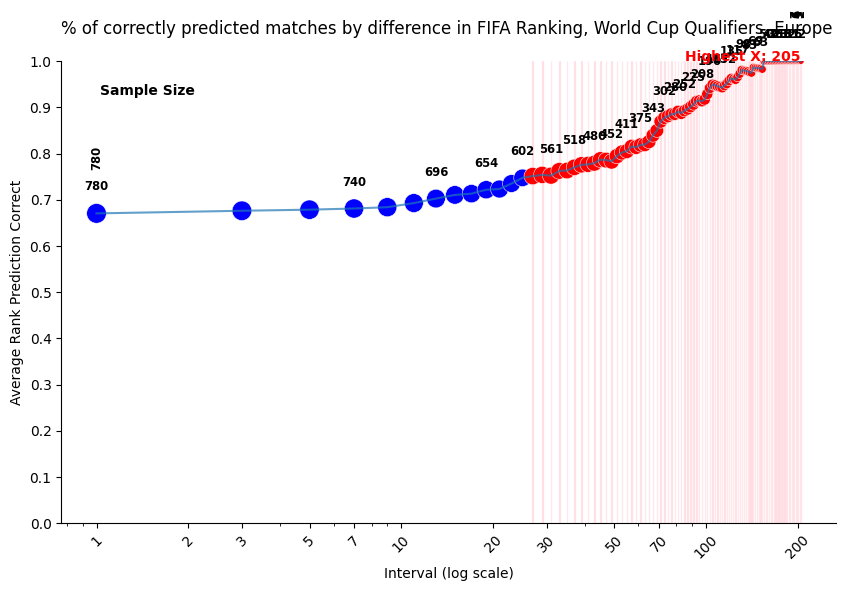

<Figure size 640x480 with 0 Axes>

In [236]:
#number = -1
number += 1
key = list(competitions_dict_above.keys())[number]
plot_competition_data_rank_difference(competitions_dict_above[key], key)
#plt.savefig(f'/Users/finneganlaister-smith/Downloads/{key}_above_intervals_win%_more_valuable_team.png')

## Below Intervals

In [237]:
below_intervals_by_comp = load_csv_dataset('Analysis_Q1/Ranking Data by competition/By competition, win % of lower FIFA ranked (better) team - below intervals.csv')

In [238]:
competitions_dict_below = {comp: df for comp, df in below_intervals_by_comp.groupby('Competition')}

In [ ]:
#number = -1
number += 1
key = list(competitions_dict_below.keys())[number]
plot_competition_data_below(competitions_dict_below[key], key)
#plt.savefig(f'/Users/finneganlaister-smith/Downloads/{key}_below_intervals_win%_more_valuable_team.png')

# INVERTED - % the higher ranked team wins

## Above Intervals

In [293]:
latest_match_data

,Match.ID,Competition,Match,Date,Season,Team.1.Name,Team.1.Code,Team.1.Players,Team.1.Values.By.Player,Team.2.Name,Team.2.Code,Team.2.Players,Team.2.Values.By.Player,Team.1.Confederation,Team.2.Confederation,Team.1.Score,Team.2.Score,score,Score.Difference,Team.1.Rank,Team.2.Rank,Rank.Difference,Market.Value.Difference,Team.1.Total.Market.Value,Team.2.Total.Market.Value,Team.1.Num.of.0.Value.Players,Team.2.Num.of.0.Value.Players,Number.of.Valuable.Players.Difference,Standardized_Rank_Difference,"Team 1, Tier 1 Global Superstars","Team 1, Tier 2 Global Superstars","Team 2, Tier 1 Global Superstars","Team 2, Tier 2 Global Superstars","Team 1, Tier 1 Confederation Stars","Team 1, Tier 2 Confederation Stars","Team 2, Tier 1 Confederation Stars","Team 2, Tier 2 Confederation Stars"
0,"World Cup Qualifiers, Asia_95","World Cup Qualifiers, Asia",Iran vs Bahrain,2011-10-11,2011,Bahrain,BH,"['Sayed Mohammed Jaffer', 'Dawood Saad', 'Husa...","0,0,0,0,0,0,0,0,0,0,0",Iran,IR,"['Mehdi Rahmati', 'Hadi Aghili', 'Seyed Jalal ...","1250000,1100000,3e+06,520000,8e+05,4e+06,75000...",AFC,AFC,0,6,0:6 NA,-6,102,50,-52,-14615000.0,0.0,14615000.0,11,0,-11,-0.831893,0,0,0,0,0,0,2,1
1,"World Cup Qualifiers, Asia_256","World Cup Qualifiers, Asia",C. Taipei vs Iraq,2015-11-17,2015,Iraq,IQ,"['Faisal Jasim', 'Noor Sabri', 'Ali Rehema', '...","0,280000,6e+05,125000,2300000,650000,1e+05,350...",Chinese Taipei,TW,"['Yu-Hung Chiu', 'Ming-Han Chiang', 'Ruei Wang...","0,0,0,0,0,0,0,75000,75000,0,25000",AFC,AFC,2,0,2:0 NA,2,87,187,100,5430000.0,5605000.0,175000.0,1,8,7,1.575311,0,0,0,0,1,0,0,0
2,"World Cup Qualifiers, Asia_295","World Cup Qualifiers, Asia",Yemen vs Uzbekistan,2015-11-17,2015,Yemen,YE,"['Mohammed Ayash', 'Hamada Al-Zubairi', 'Moham...","0,0,0,0,0,0,0,0,0,0,0",Uzbekistan,UZ,"['Aleksandr Lobanov', 'Anzur Ismoilov', 'Egor ...","5e+05,450000,450000,6e+06,5e+05,650000,9e+06,4...",AFC,AFC,1,3,1:3 NA,-2,179,71,-108,-22050000.0,0.0,22050000.0,11,0,-11,-1.718757,0,0,0,1,0,0,2,2
3,"World Cup Qualifiers, Asia_299","World Cup Qualifiers, Asia",Uzbekistan vs Bahrain,2016-03-29,2016,Bahrain,BH,"['Hesham Nayem', 'Mohammed Husain', 'Sayed Dhi...","0,0,125000,0,150000,0,0,1e+05,6e+05,0,0",Uzbekistan,UZ,"['Aleksandr Lobanov', 'Anzur Ismoilov', 'Egor ...","6e+05,450000,3e+05,5e+06,4e+05,650000,5e+06,8e...",AFC,AFC,0,1,0:1 NA,-1,132,74,-58,-16425000.0,975000.0,17400000.0,7,0,-7,-0.926914,0,0,0,0,0,0,3,1
4,"World Cup Qualifiers, Africa_111","World Cup Qualifiers, Africa",DR Congo vs Libya,2013-03-24,2013,Libya,LY,"['Ahmed Alwani', 'Abdulrahman Al-Amaami', 'Abu...","1e+05,0,1e+05,120000,150000,3e+05,1e+05,75000,...",DR Congo,DR,"['Robert Muteba Kidiaba', 'Cédric Mongongu', '...","7e+05,2750000,750000,350000,0,8e+06,1e+06,1600...",CAF,CAF,0,0,0:0 NA,0,65,81,16,-22280000.0,1845000.0,24125000.0,2,1,-1,0.245014,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5314,"Africa Cup of Nations, Qualifiers_710","Africa Cup of Nations, Qualifiers",Seychelles vs Lesotho,2022-03-23,2022,Seychelles,SCH,"['Alvin Michel', 'Don Fanchette', 'Benoit Mari...","0,0,0,0,0,0,0,0,0,0,0",Lesotho,LS,"['Sekhoane Moerane', 'Basia Makepe', 'Lisema L...","0,0,0,0,0,0,0,80000,0,150000,0",CAF,CAF,0,0,0:0 NA,0,196,146,-50,-230000.0,0.0,230000.0,11,9,-2,-0.800219,0,0,0,0,0,0,0,0
5315,"Africa Cup of Nations, Qualifiers_711","Africa Cup of Nations, Qualifiers",Djibouti vs South Sudan,2022-03-23,2022,Djibouti,DJ,"['Innocent Mbonihankuye', 'Moussa Hamadou Arai...","0,0,0,0,50000,0,0,0,0,0,0",South Sudan,SS,"['Ramadan John', 'Peter Maker', 'Rashid Toha',...","0,8000,0,0,0,0,0,0,3e+05,150000,125000",CAF,CAF,2,4,2:4 NA,-2,192,168,-24,-533000.0,50000.0,583000.0,10,7,-3,-0.388460,0,0,0,0,0,0,0,0
5316,"Africa Cup of Nations, Qualifiers_712","Africa Cup of Nations, Qualifiers",Somalia vs Eswatini,2022-03-23,2022,Somalia,SO,"['Mustaf Yuusuf', 'Ahmed Said Ahmed', 'Haji Ab...","0,0,30000,0,25000,1e+0

In [255]:
above_intervals_by_comp = load_csv_dataset('Analysis_Q1/Ranking Data by competition/By competition, win % of higher FIFA ranked (worse) team - above intervals.csv')

In [256]:
# Assuming above_intervals_by_comp is already loaded
competitions_dict_above = {comp: df for comp, df in above_intervals_by_comp.groupby('Competition')}

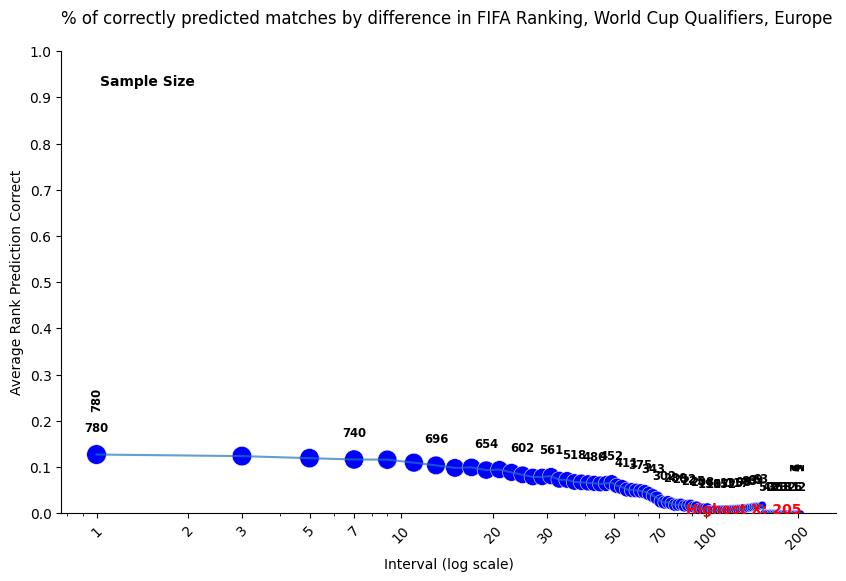

<Figure size 640x480 with 0 Axes>

In [292]:
#number = -1
number += 1
key = list(competitions_dict_above.keys())[number]
plot_competition_data_rank_difference(competitions_dict_above[key], key)
#plt.savefig(f'/Users/finneganlaister-smith/Downloads/{key}_above_intervals_win%_more_valuable_team.png')

## Below Intervals

In [271]:
below_intervals_by_comp = load_csv_dataset('Analysis_Q1/Ranking Data by competition/By competition, win % of higher FIFA ranked (worse) team - below intervals.csv')

In [272]:
competitions_dict_below = {comp: df for comp, df in below_intervals_by_comp.groupby('Competition')}

In [288]:
#number = -1
number += 1
key = list(competitions_dict_below.keys())[number]
plot_competition_data_below(competitions_dict_below[key], key)
#plt.savefig(f'/Users/finneganlaister-smith/Downloads/{key}_below_intervals_win%_more_valuable_team.png')

IndexError: list index out of range